<a href="https://colab.research.google.com/github/ezzatmostafa96/Independent-Projects/blob/master/testing_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cp -r /content/drive/MyDrive/ko2 /content

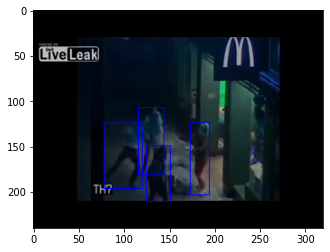

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/ko2/Assault052_x264-45.jpg')
dh, dw, _ = img.shape
lst = []
fl = open('/content/ko2/Assault052_x264-45.txt', 'r')
data = fl.readlines()
fl.close()
# output = open(('/content/21.txt','w')
for dt in data:

    # Split string to float
    m, x, y, w, h = map(float, dt.split(' '))
    
    

    # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
    # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    
    lst.append([m,l, r, t,b])

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

plt.imshow(img)
plt.show()


In [3]:
lst

[[0.0, 125, 151, 149, 210],
 [0.0, 173, 194, 123, 203],
 [0.0, 78, 120, 124, 196],
 [0.0, 116, 144, 107, 181]]

In [4]:
with open('/content/txt_file.txt', 'w') as x:
    x.write('\n'.join(' '.join(map(str, row)) for row in lst))

In [5]:
import csv

# preparing data - converting to array
rows = []
with open('/content/txt_file.txt', mode='r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    for row in reader:  # each row is a list
        rows.append(row)

# lambda function to filter min considering the second column
minimus_x = min(rows, key=lambda x: float(x[1]))
minimus_y = max(rows, key=lambda x: float(x[2]))
minimus_width = min(rows, key=lambda x: float(x[3]))
minimus_height = max(rows, key=lambda x: float(x[4]))
minimus_h = min(rows, key=lambda x: float(x[0]))

# done
print(minimus_x[1])
print(minimus_y[2])
print(minimus_width[3])
print(minimus_height[4])

78
194
107
210


In [6]:
output = open('/content/last_txt_file.txt','w')
fr =(minimus_x[0])+ ' ' +(minimus_x[1])+ ' ' +(minimus_y[2]) + ' ' +(minimus_width[3])+ ' ' +(minimus_height[4])
output.write(fr)
output.close()

In [7]:

dh, dw = 240,320
lst = []
fl = open('/content/last_txt_file.txt', 'r')
data = fl.readlines()
fl.close()
# output = open(('/content/21.txt','w')
for dt in data:

    # Split string to float
    m, one, two, three, four = map(float, dt.split(' '))
    
    

    # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
    # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
    dw = 1./dw
    dh = 1./dh
    x = (one + two)/2.0
    y = (three + four)/2.0
    w = two - one
    h = four - three
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    

    
    lst.append([m,x, y, w,h])

  

In [8]:
lst

[[0.0,
  0.42500000000000004,
  0.6604166666666667,
  0.36250000000000004,
  0.42916666666666664]]

In [9]:
with open('/content/txt_file2.txt', 'w') as x:
    x.write('\n'.join(' '.join(map(str, row)) for row in lst))

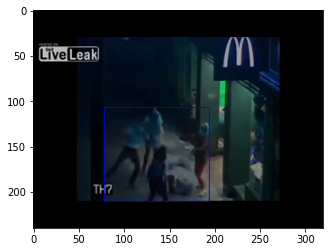

78 194 107 210
0.42500000000000004 0.36250000000000004 0.6604166666666667 0.42916666666666664
320 240


In [10]:
img = cv2.imread('/content/ko2/Assault052_x264-45.jpg')
dh, dw, _ = img.shape

fl = open('/content/txt_file2.txt', 'r')
data = fl.readlines()
fl.close()

for dt in data:

    # Split string to float
    _, x, y, w, h = map(float, dt.split(' '))

    # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
    # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

plt.imshow(img)
plt.show()
print(str(l)+ ' ' + str(r) + ' ' +  str(t)+ ' ' + str(b) )
print(str(x)+ ' ' + str(w) + ' ' +  str(y)+ ' ' + str(h) )
print(str(dw)+ ' ' + str(dh) )


In [12]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

In [11]:
!cp -r /content/drive/MyDrive/result_assualt.json /content

In [13]:
pwd

'/content'

In [14]:
!mkdir hamada

In [15]:
cd /content/hamada

/content/hamada


In [ ]:
import json 
  
# Opening JSON file 
f = open('/content/result_assualt.json',) 
  
# returns JSON object as  
# a dictionary 
data = json.load(f) 
  
# Iterating through the json 
# list 
for i in data: 
  # print('--------------------------------------------------')
  print(i)
  path_list = i['filename'].split(os.sep)
  path_list = path_list[-1].replace('.jpg', '')
  print(path_list)
  output = open((path_list.strip())+'.txt','w')
  for j in i['objects']:
    # print('--------------------------------------------------')
    print(j)
    fr = str(0)+ ' ' +str(j['relative_coordinates']['center_x'])+ ' ' +str(j['relative_coordinates']['center_y']) + ' ' +str(j['relative_coordinates']['width'])+ ' ' +str(j['relative_coordinates']['height']) + '\n' 
    output.write(fr) 
    output.close()
  print('--------------------------------------------------')
  fl = open((path_list.strip())+'.txt','r')
  data = fl.readlines()
  fl.close()
  # output = open(('/content/21.txt','w')
  for dt in data:
      dw,dh = 320,240
      # Split string to float
      m, x, y, w, h = map(float, dt.split(' '))
      
      

      # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
      # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
      l = int((x - w / 2) * dw)
      r = int((x + w / 2) * dw)
      t = int((y - h / 2) * dh)
      b = int((y + h / 2) * dh)
      
      if l < 0:
          l = 0
      if r > dw - 1:
          r = dw - 1
      if t < 0:
          t = 0
      if b > dh - 1:
          b = dh - 1

      
      lst.append([m,l, r, t,b])


  # path_list = x.split(os.sep)
  # path_list = path_list[-1].replace('.jpg', '')
  # print(path_list)      
  # output = open((path_list.strip())+'.txt','w')
  # output.write("1") 
  # output.close()